In [0]:
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.utils import *
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
def get_model(x_train,y_train,x_test,y_test):
  
  model = Sequential()                                                                                 # base model
  model.add(Conv2D(64, kernel_size=3, strides=(1, 1), input_shape =(28,28,1), activation ='relu'))     # as the image is in grayscale the shape is 28,28,1 (if rgb = (28,28,3))
                                                                                                       # Conv2D is used for spatial convolution over images, 64 feature maps
  model.add(MaxPooling2D(pool_size = (2,2)))                                                
  model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))                                                                              # 20% probability to reduce overfitting
  model.add(Flatten())                                                                                 # so that can be fed to fully connected layer
  model.add(Dense(128, activation = "relu"))                                                           # Fully connected layer
  model.add(Dense(10, activation = "softmax"))                                                         # Output layer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  print("\n Model Summary \n")
  model.summary()

  print("\n Model Training \n")
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size = 128, verbose=2) #Training the model (epochs, batch_size = hyperparameters)
                    
  plt.plot(history.history['acc'])                                                                        # summarize history for accuracy
  plt.plot(history.history['val_acc'])
  plt.title('\n Model Accuracy \n')
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])                                                                       # summarize history for loss
  plt.plot(history.history['val_loss'])
  plt.title('\n Model Loss \n')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  return model 

In [0]:
def train_model():
  
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  target_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover' , 3: 'Dress', 4: 'Coat' , 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
  print('Train shape: X=%s, y=%s' % (x_train.shape, y_train.shape))
  print('Test shape: X=%s, y=%s' % (x_test.shape, y_test.shape))
  x_train = x_train.reshape(60000,28,28,1)                        # reshape to be (batch, rows, cols, channels) to be fed into CNN [ data_format is "channels_last" ] 
  x_test = x_test.reshape(10000,28,28,1)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255                                                  # Grayscale (0-255), convert into [0,1]
  x_test /= 255
  classes = 10
  y_train = to_categorical(y_train,classes)                        # Target values not taken as numerical values; as different items(one-hot encoded vectors)
  y_test = to_categorical(y_test,classes)
  
  
  model = get_model(x_train,y_train,x_test,y_test)                # Function call for training
  y_test_pred = model.predict(x_test)                             # Testing
  
  print("\n Some Outputs\n")
  for i in range(10):                                             # Print first 10 test images with output classes 
    img = x_test[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print("Target Value: ",target_dict.get(np.argmax(y_test_pred[i])))
  
  # Final evaluation of the model
  scores = model.evaluate(x_test, y_test, verbose=0)
  print("Large CNN Error: %.2f%%" % (100-scores[1]*100))
  
  return model

Train shape: X=(60000, 28, 28), y=(60000,)
Test shape: X=(10000, 28, 28), y=(10000,)


W0827 04:58:06.274036 140052828317568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 04:58:06.293282 140052828317568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 04:58:06.296528 140052828317568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 04:58:06.323820 140052828317568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 04:58:06.357285 140052828317568 deprecation_wrapp


 Model Summary 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102

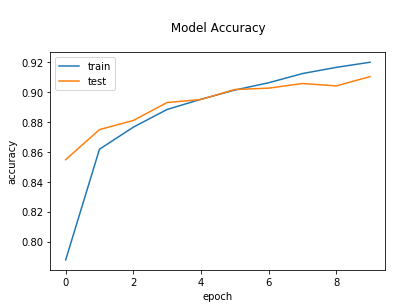

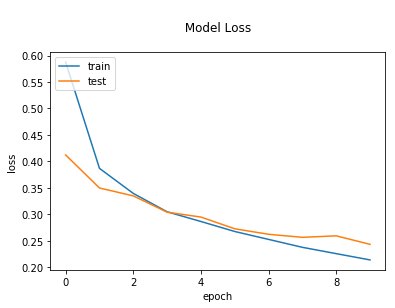


 Some Outputs



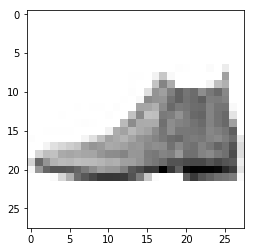

Target Value:  Ankle boot


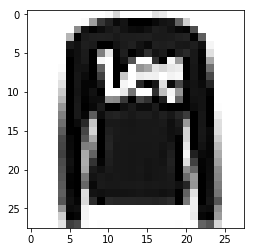

Target Value:  Pullover


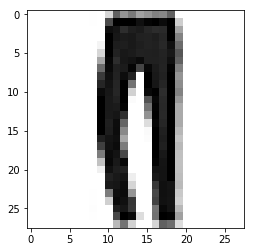

Target Value:  Trouser


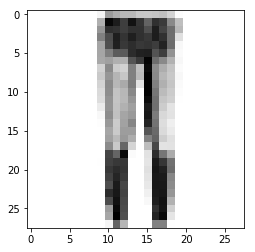

Target Value:  Trouser


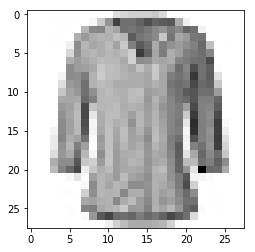

Target Value:  Shirt


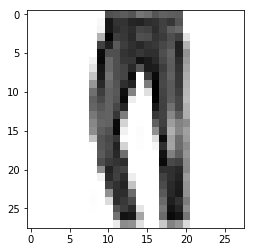

Target Value:  Trouser


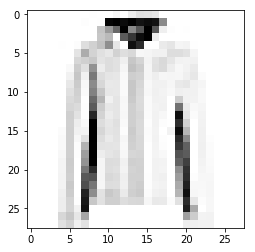

Target Value:  Coat


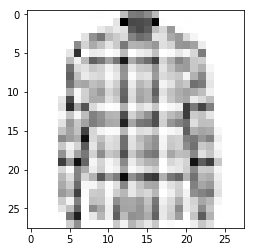

Target Value:  Shirt


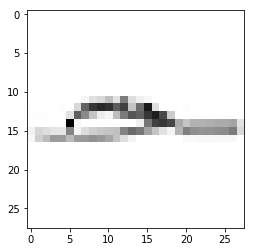

Target Value:  Sandal


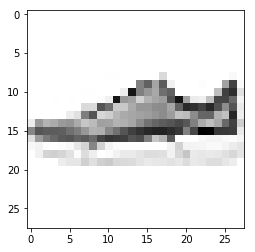

Target Value:  Sneaker
Large CNN Error: 8.98%


In [0]:
train_model()